# Problem

The problem is to predict whether a passenger survived or not, based on various features such as age, sex, class, etc.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Preprocessing

In [2]:
data = pd.read_csv('titanic survival data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
data_description = data.describe()
data_description 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

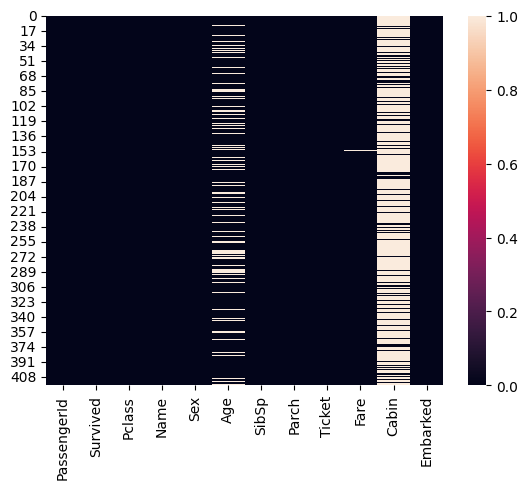

In [6]:
sns.heatmap(data.isna())
# visualizing missing values

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# filling mean values of fare and age
fare_mean = data_description.loc['mean', 'Fare']
data['Fare'].fillna(fare_mean, inplace = True)

In [9]:
age = data['Age']
age_mean = data_description.loc['mean', 'Age']
age.fillna(age_mean, inplace = True)

In [10]:
age.isna().sum()

0

In [11]:
# dropping irrelevant features
data.drop(['Cabin','PassengerId','Name','Ticket'], axis=1, inplace=True)

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


# Data visualization 

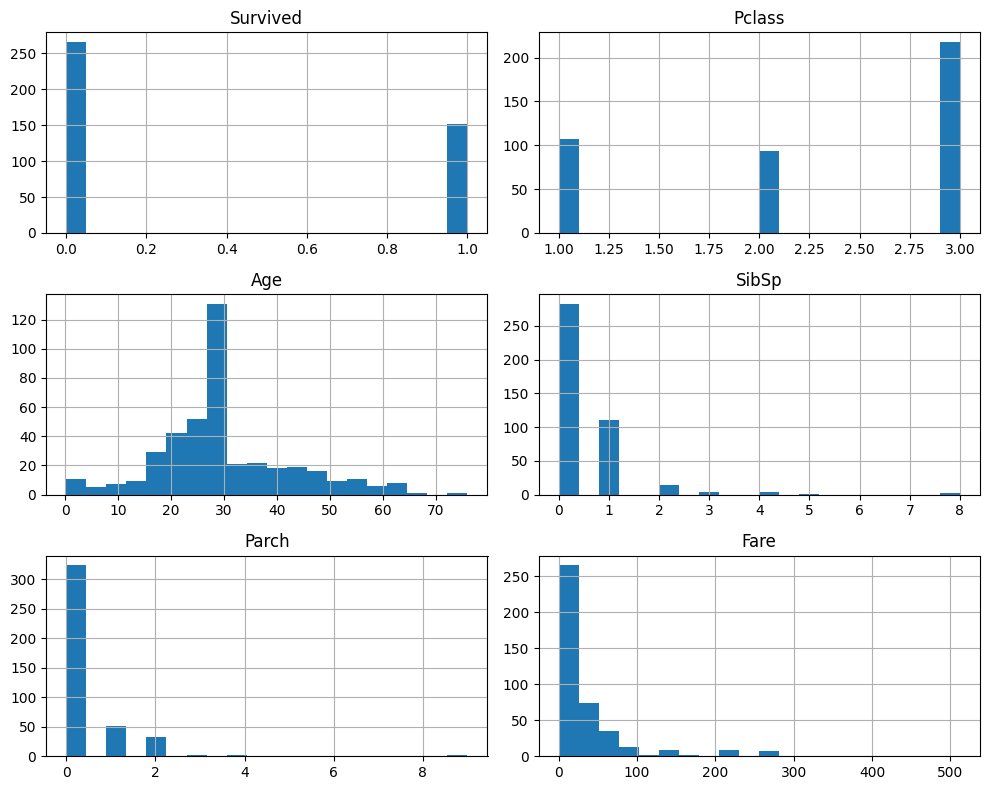

In [13]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

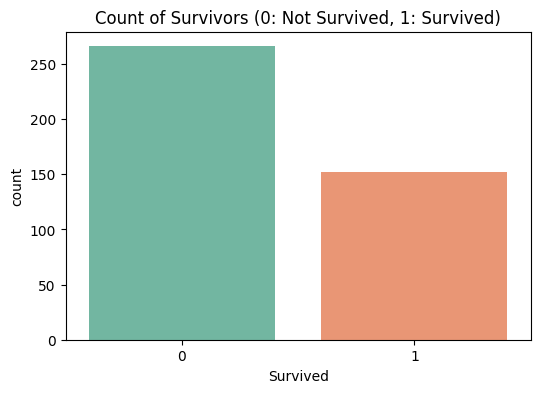

In [14]:
# visualizing count of survivors and non-survivors using a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, palette='Set2')
plt.title('Count of Survivors (0: Not Survived, 1: Survived)')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

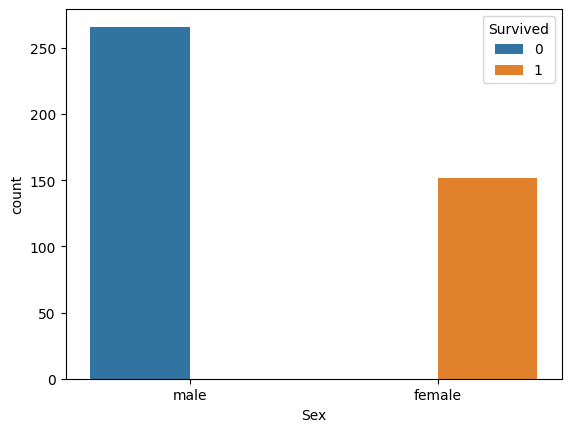

In [15]:
# analyzing count of male and female survivors
sns.countplot(x = 'Sex', hue='Survived', data=data)

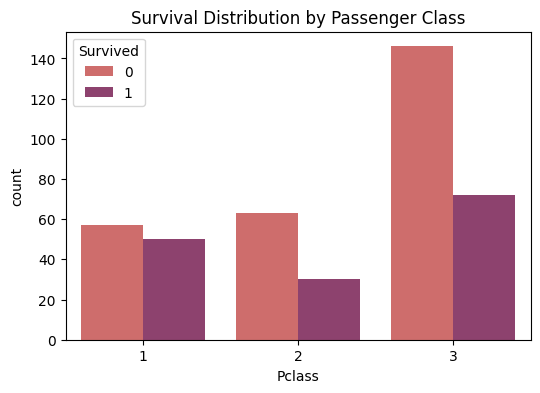

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='flare')
plt.title('Survival Distribution by Passenger Class')
plt.show()

In [17]:
data['Embarked'].value_counts()
# 2-S, 0-C, 1-Q

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [18]:
data['Sex'].value_counts() 
# male - 1, female - 0

Sex
male      266
female    152
Name: count, dtype: int64

In [19]:
# convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [20]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


# Separating data

In [21]:
x = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = data['Survived']

# Data Splitting

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Data Modelling

In [23]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
predict = lr.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,92,0
Actual Yes,0,46


In [26]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [27]:
accuracy = accuracy_score(y_test,predict)
print('Accuracy is: ',accuracy)

Accuracy is:  1.0
